Primer práctica de Mineria de Datos (Lineal Model )

In [58]:
#Comenzamos importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from IPython.display import HTML


In [59]:
#Importamos el dataset
file_path = r"C:\Users\yetla\Downloads\lineal_separado.csv"
data = pd.read_csv(file_path)
data.columns
#Index(["Transacciones","Ventas"], dtype="object")
data.head()


,transacciones,ventas
0,43,665262.96
1,221,2573039.56
2,215,2104739.32
3,186,1642062.77
4,253,3666605.86


In [60]:
"""#Seleccionamos filas y columnas de un Df, seleccionando todas las filas y la columna 0 
X = data.iloc[:, :0].values
z = data.iloc[:, 1].values
#Método de NumPy para cambiar la forma (dimensiones de un array)
X = X.reshape(-1, 1)"""

# Seleccionamos todas las filas y la columna 0 para X, y la columna 1 para z
X = data.iloc[:, 0].values
z = data.iloc[:, 1].values

# Método de NumPy para cambiar la forma (dimensiones de un array)
X = X.reshape(-1, 1)


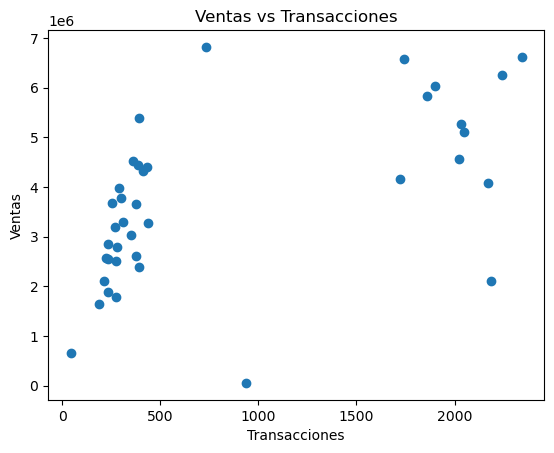

In [61]:
#Gráfica de los datos
plt.scatter(X, z)
plt.title('Ventas vs Transacciones')
plt.xlabel('Transacciones')
plt.ylabel('Ventas')
plt.show()

Antes de continuar verifiquemos los supuestos estadisticas de un Modelo de Regresión Lineal

1. Existe una relación aproximadamente lineal
2. Independencia de Errores: Vericar que los errores sean independinetes entre sí utilizando el gráfico de resisduos en la función del índice y prueba de Durbin-Watson
3. Hocedasticidad
4. Normalidad de los errores



Así mismo recordar: 

1. Entrenamiento
2. Prueba
3. Validación 

In [62]:
#Separamos los datos en entrenamiento y prueba
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
#Creamos el modelo de regresión lineal
lm = linear_model.LinearRegression()
#Entrenamos el modelo
lm.fit(X_train, z_train)
#Hacemos predicciones
y_pred = lm.predict(X_test)

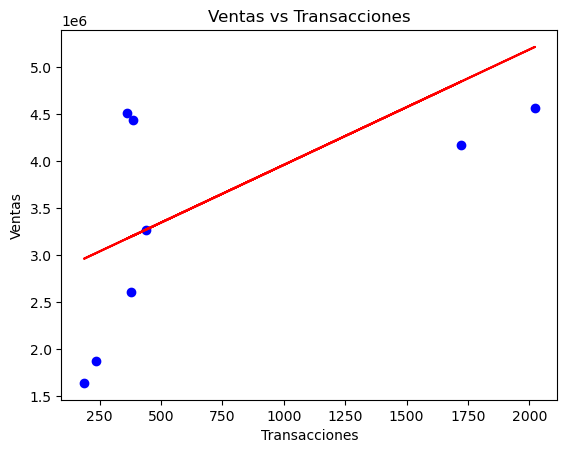

In [63]:
#Gráfica de los datos de entrenamiento
plt.scatter(X_test, z_test, color='blue')
plt.plot(X_test, y_pred, color="red")
plt.title('Ventas vs Transacciones')
plt.xlabel('Transacciones')
plt.ylabel('Ventas')
plt.show()

In [64]:
#Valores obtenidos
print('Coeficiente: ', lm.coef_)
print('Intercepto: ', lm.intercept_)
print('Precisión del modelo: ', lm.score(X_train, z_train))
print("Ecuación de la recta: y = ", lm.coef_, "x + ", lm.intercept_)

Coeficiente:  [1227.30754459]
Intercepto:  2734331.4929901045
Precisión del modelo:  0.3245747263764306
Ecuación de la recta: y =  [1227.30754459] x +  2734331.4929901045


In [65]:
#Este tipo de modelo debe de ir acompañado de la precisi+on
#del modelo para saber si es un buen modelo o no.
print(lm.score(X_test, z_test))

0.2637386925807794


In [66]:
"""Analizando los supuestos estadísticos el primero se
    cumple, necesitamos definir los errores en una regresión
    lineal. Estos son la diferencia entre los valores observados
    y (valores reales) y los valores predichos del modelo """
    
residuos = z_test - y_pred
print(residuos)

[   -2933.23506673  -590472.61730192 -1145436.28596962 -1320547.92628453
  -679998.87478043  1337589.83095617  -649568.60815854  1237123.91234133]


Text(0.5, 1.0, 'Residuos del modelo')

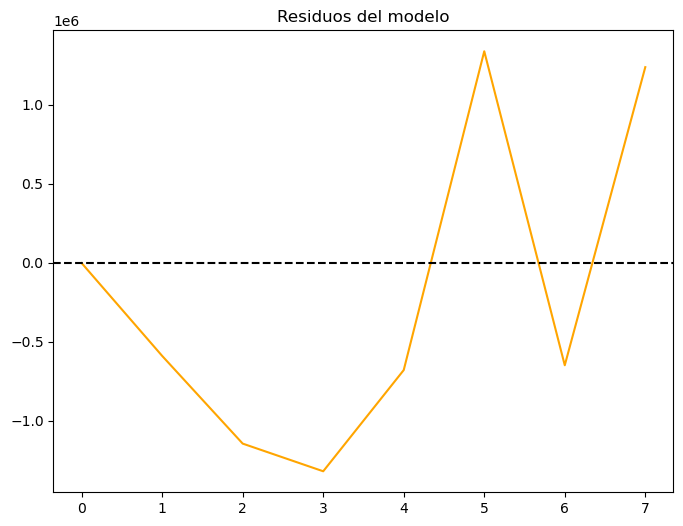

In [67]:
"""Recordemos además que los supuestos estadisticos los podemos
   trabajar de dos maneras: Visualización de datos y estadísticos
    formales. En este caso, vamos a visualizar los datos"""
    
plt.figure(figsize=(8, 6))
plt.plot(residuos, color= "orange", label = "Residuos")
plt.axhline(y=0, color='black', linestyle='--', label = "Línea base")
plt.title('Residuos del modelo')

Nota. Si los valores están dispersos aleatoriamente alrededor del 0, sin ningún patrón visible, es un indicio de que no hay correlación serial.

Desde el punto de vista estadístico, se debe comprobar el estadístico Durbin-Watson, el cual es una medida para detectar la autocorrelación de los residuos.

a) DW ≈ 2: No hay correlación

b) DW < 2: Autocorrelación positiva (los residuos están correlacionados)

c) DW > 2: Autocorrelación negativa (inversamente correlacionados)

d) DW ≈ 0: Muy alta correlación positiva

e) DW ≈ 4: Muy alta correlación negativa

In [68]:
import statsmodels.api as sm

lr = sm.OLS(z, sm.add_constant(X))
modelo = lr.fit()
dw = sm.stats.durbin_watson(modelo.resid)
print("Estadístico de Durbin-Watson: ", dw)

Estadístico de Durbin-Watson:  1.1379824483302898


Homocedasticidad
Generaremos una visualización de datos de residuos vs predicciones

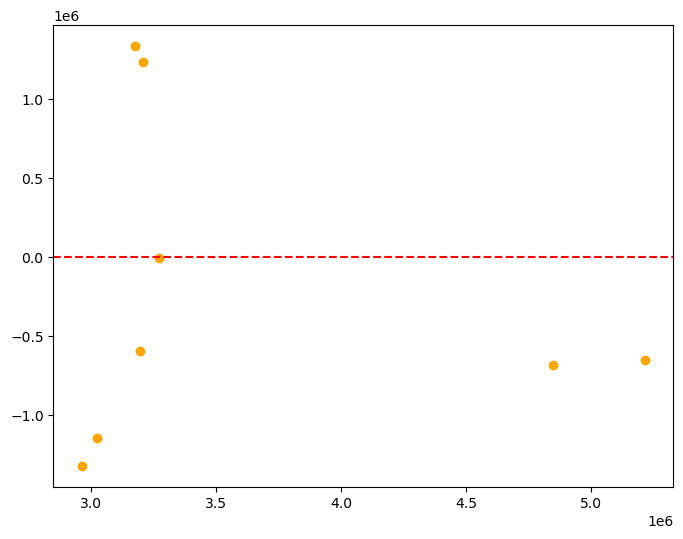

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color= "orange", label = "Residuos vs Predicciones")
plt.axhline(y=0, color='red', linestyle='--', label = "Línea base")

In [70]:
#La prueba de Breusch-Pagan es una prueba estadística utilizada
#para detectar heterocedasticidad en un modelo de regresión lineal.
#La hipótesis nula (H₀) de la prueba de Breusch-Pagan es que no hay
#heterocedasticidad (es decir, la varianza de los errores es constante),
# mientras que la hipótesis alternativa (H₁) es que existe
#heterocedasticidad (es decir, la varianza de los errores no es
#constante).

#Si el p-valor es mayor que 0.05: No se rechaza la hipótesis nula,
#lo que indica que no hay evidencia de heterocedasticidad.

#Si el p-valor es menor que 0.05: Se rechaza la hipótesis nula,
#lo que sugiere que hay heterocedasticidad.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

# Crear el modelo de regresión lineal
X_with_const = sm.add_constant(X)  # Añadir la constante para el intercepto
model = sm.OLS(z, X_with_const).fit()  # Ajustar el modelo de regresión

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

bp_statistic, p_value, _, _ = bp_test

# Imprimir el resultado
print(f"Estadístico de Breusch-Pagan: {bp_statistic}")
print(f"P-valor de Breusch-Pagan: {p_value}")

#Dado que el p-valor es mayor que 0.05, no hay evidencia suficiente
#para rechazar la hipótesis nula. Esto sugiere que no existe
#heterocedasticidad en tu modelo, lo que significa que los residuos
#parecen tener varianza constante y el modelo cumple con el supuesto
#de homocedasticidad

Estadístico de Breusch-Pagan: 0.6114800318807054
P-valor de Breusch-Pagan: 0.43423109560640694


Ejercicio para abordar. Predice el número de espacios educativos para el año 2030.


Número de estudiantes de educación media superior: Datos históricos sobre el aumento de estudiantes de  educación media superior en los últimos de 5 a 10 años.

Número de espacios educativos: Datos sobre la cantidad de espacios educativos disponibles durante el mismmo período. 

Sabemos que la UNAM es una de las universidades más demandadas anualmente para estudiar una licenciatura en México, debido a su prestigio y amplia oferta académica. Miles de estudiantes compiten cada año por ingresar a esta institución. Con base en esta información, recopilamos datos del periodo 2017 a 2024 sobre la oferta y demanda de licenciaturas escolarizadas en la UNAM. Utilizamos estos datos para realizar un análisis de regresión lineal, con el objetivo de predecir el número de aspirantes (demanda) para el año 2030. Este estudio nos permitirá proponer soluciones que ayuden a la universidad a gestionar de manera más eficiente la creciente demanda de espacios educativos.

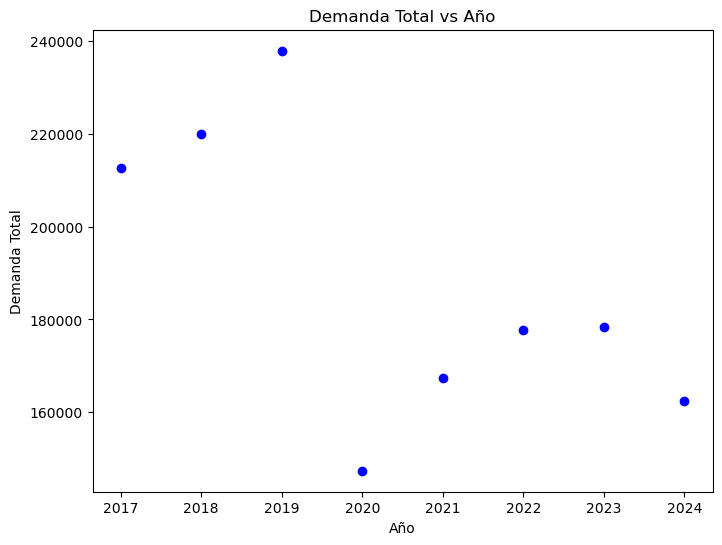

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Datos proporcionados
data = {
    "Año": [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Oferta": ["11,212", "11,673", "11,823", "9000", "13,245", "13,344", "13,632", "13,641"],
    "Demanda Total": ["212,686", "219,881", "237,848", "147443", "167,432", "177,780", "178,404", "162,460"],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Limpiar los datos: eliminar comas y convertir a números
df["Oferta"] = df["Oferta"].str.replace(",", "").astype(float)
df["Demanda Total"] = df["Demanda Total"].str.replace(",", "").astype(float)

# Definir las variables independiente (X) y dependiente (z)
X = df[["Año"]]  # Variable independiente (Año)
z = df["Demanda Total"]  # Variable dependiente (Demanda Total)

#Graficar los datos
plt.figure(figsize=(8, 6))  
plt.scatter(X, z, color='blue')
plt.title('Demanda Total vs Año')
plt.xlabel('Año')
plt.ylabel('Demanda Total')
plt.show()

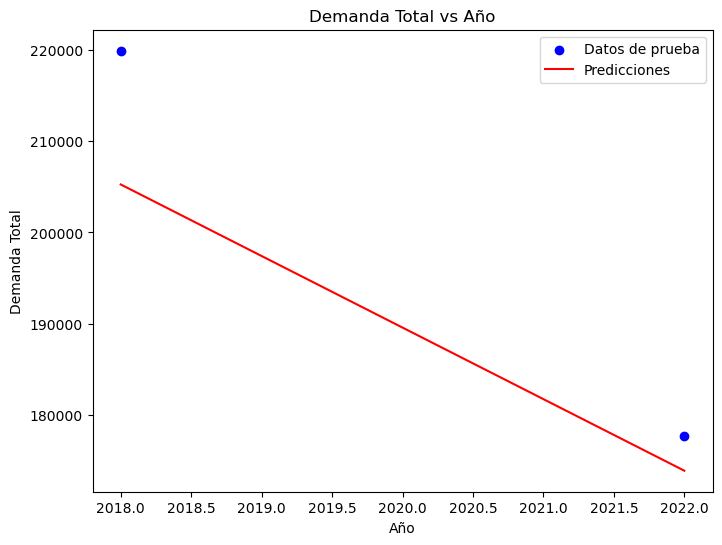

In [127]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
lm = LinearRegression()

# Entrenar el modelo
lm.fit(X_train, z_train)

# Hacer predicciones
z_pred = lm.predict(X_test)

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test, z_test, color='blue', label="Datos de prueba")
plt.plot(X_test, z_pred, color='red', label="Predicciones")
plt.title('Demanda Total vs Año')
plt.xlabel('Año')
plt.ylabel('Demanda Total')
plt.legend()
plt.show()

In [128]:
# Valores obtenidos
print('Coeficiente: ', lm.coef_)
print('Intercepto: ', lm.intercept_)
print('Precisión del modelo (R²): ', lm.score(X_train, z_train))
print("Ecuación de la recta: y = ", lm.coef_[0], "x + ", lm.intercept_)

# Precisión en el conjunto de prueba
print("Precisión en el conjunto de prueba: ", lm.score(X_test, z_test))

Coeficiente:  [-7828.12]
Intercepto:  16002399.980000006
Precisión del modelo (R²):  0.3504988909034561
Ecuación de la recta: y =  -7828.120000000003 x +  16002399.980000006
Precisión en el conjunto de prueba:  0.7419571751276015


Residuos:  1    14627.18
5     3838.66
Name: Demanda Total, dtype: float64


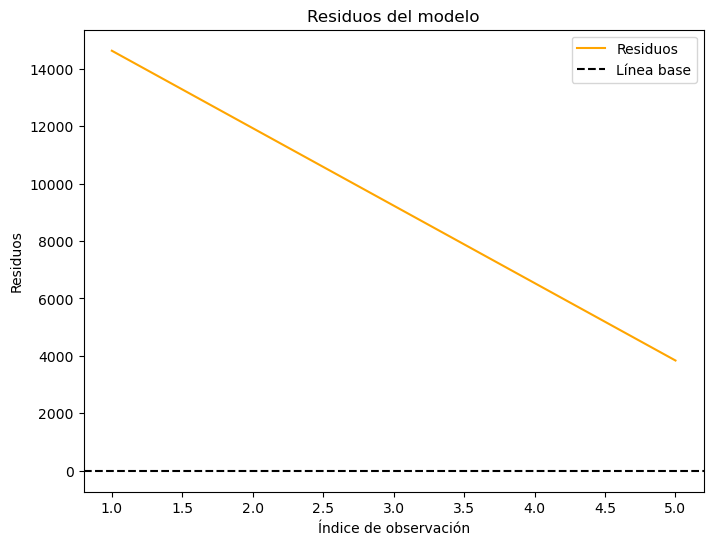

In [129]:
# Calcular los residuos
residuos = z_test - z_pred
print("Residuos: ", residuos)

# Gráfica de residuos
plt.figure(figsize=(8, 6))
plt.plot(residuos, color="orange", label="Residuos")
plt.axhline(y=0, color='black', linestyle='--', label="Línea base")
plt.title('Residuos del modelo')
plt.xlabel('Índice de observación')
plt.ylabel('Residuos')
plt.legend()
plt.show()



In [130]:
# Verificar el supuesto de homocedasticidad con Breusch-Pagan
X_with_const = sm.add_constant(X_test)  # Añadir la constante para el intercepto
model = sm.OLS(z_test, X_with_const).fit()  # Ajustar el modelo de regresión

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_statistic, p_value, _, _ = bp_test

# Imprimir el resultado
print(f"Estadístico de Breusch-Pagan: {bp_statistic}")
print(f"P-valor de Breusch-Pagan: {p_value}")


Estadístico de Breusch-Pagan: 2.0
P-valor de Breusch-Pagan: 0.15729920705028105


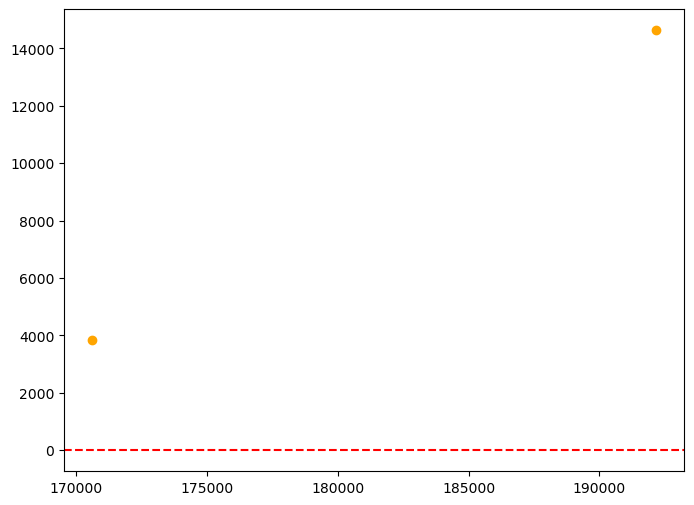

In [131]:
#Graficamos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color= "orange", label = "Residuos vs Predicciones")
plt.axhline(y=0, color='red', linestyle='--', label = "Línea base")
plt.show()


In [134]:
# Predicción para el año 2030
año_2030 = np.array([[2030]])  # Año para la predicción
demanda_2030 = lm.predict(año_2030)
print(f"Predicción de Demanda Total para el año 2030: {demanda_2030[0]:.2f}")

Predicción de Demanda Total para el año 2030: 111316.38


c:\Users\yetla\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
